# Attraction sweep and clustering transition

In this notebook, we systematically study how the strength of attraction affects
the emergence of spatial clustering in our simplified universe model.

We fix all other parameters (noise, number of particles, simulation time) and
sweep over different values of the attraction parameter.  
For each setting, we repeat the simulation with multiple random seeds to obtain
robust averages.

In [9]:
import os, sys
sys.path.append(os.path.abspath(".."))

import numpy as np
import matplotlib.pyplot as plt

from src.universe_sim import run_simulation
from src.metrics import nearest_neighbor_distance, largest_cluster_fraction

We keep the following parameters fixed throughout the experiment:

- Number of particles: N = 300  
- Number of time steps: 400  
- Box size: 1.0  
- Noise strength: 0.03  

Only the attraction strength will be varied.

In [10]:
# Fixed simulation settings
N = 300
steps = 400
box_size = 1.0
noise = 0.03

# Parameters for clustering metric
eps = 0.05   # distance threshold for largest cluster fraction

# Attraction values to scan
A_values = np.linspace(0.0, 0.20, 11)

# Random seeds for repeated runs
seeds = [0, 1, 2, 3, 4]

To avoid code duplication, we define a small helper function that runs one
simulation for a given attraction strength and random seed, and returns the
clustering observables measured at the final time step.

In [11]:
def run_single_simulation(A, seed):
    np.random.seed(seed)

    history = run_simulation(
        N=N,
        steps=steps,
        box_size=box_size,
        attraction=A,
        noise=noise
    )

    final_positions = history[-1]

    nn_distance = nearest_neighbor_distance(
        final_positions, box_size=box_size
    )
    largest_cluster = largest_cluster_fraction(
        final_positions, eps=eps, box_size=box_size
    )

    return nn_distance, largest_cluster

For each attraction value, we run the simulation five times with different
random seeds.  
We then compute the mean and standard deviation of the observables.

In [12]:
nn_mean, nn_std = [], []
lc_mean, lc_std = [], []

for A in A_values:
    nn_values = []
    lc_values = []

    for seed in seeds:
        nn, lc = run_single_simulation(A, seed)
        nn_values.append(nn)
        lc_values.append(lc)

    nn_mean.append(np.mean(nn_values))
    nn_std.append(np.std(nn_values))

    lc_mean.append(np.mean(lc_values))
    lc_std.append(np.std(lc_values))

nn_mean = np.array(nn_mean)
nn_std = np.array(nn_std)
lc_mean = np.array(lc_mean)
lc_std = np.array(lc_std)

The largest cluster fraction can be interpreted as an order-parameter–like
quantity:  

- Values close to zero indicate a nearly uniform configuration  
- Large values indicate the presence of a dominant cluster  

We therefore plot this quantity as a function of attraction strength.

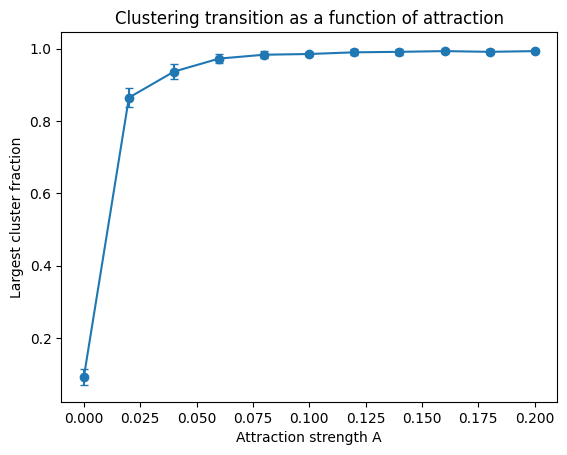

In [13]:
plt.figure()
plt.errorbar(A_values, lc_mean, yerr=lc_std, fmt="o-", capsize=3)
plt.xlabel("Attraction strength A")
plt.ylabel("Largest cluster fraction")
plt.title("Clustering transition as a function of attraction")
plt.show()

As a complementary observable, we also examine the average nearest-neighbour
distance.  
A decreasing distance typically corresponds to stronger clustering.

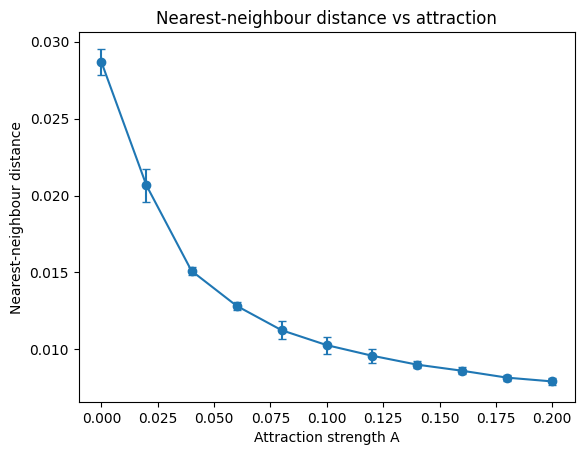

In [14]:
plt.figure()
plt.errorbar(A_values, nn_mean, yerr=nn_std, fmt="o-", capsize=3)
plt.xlabel("Attraction strength A")
plt.ylabel("Nearest-neighbour distance")
plt.title("Nearest-neighbour distance vs attraction")
plt.show()

Finally, we directly visualize particle positions at the final time step for
two representative cases:  

- No attraction (A = 0)  
- Strong attraction (largest A in the sweep)  

This provides a qualitative sanity check of the clustering behaviour.

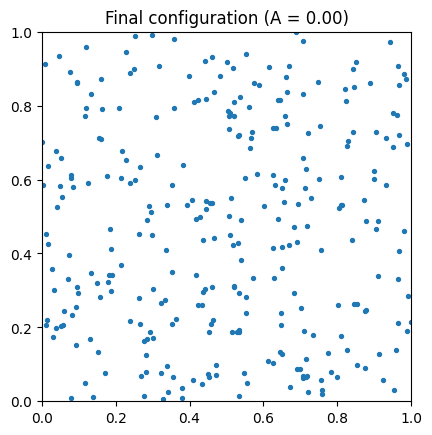

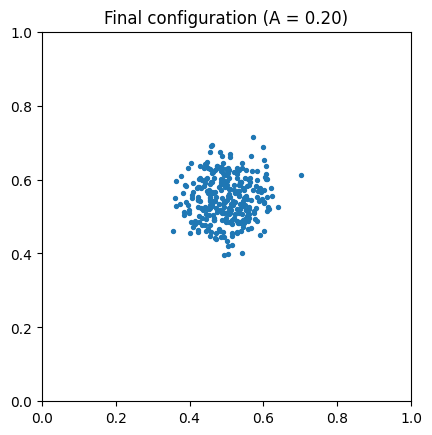

In [15]:
def plot_final_configuration(A, seed=0):
    np.random.seed(seed)
    history = run_simulation(
        N=N,
        steps=steps,
        box_size=box_size,
        attraction=A,
        noise=noise
    )
    positions = history[-1]

    plt.figure()
    plt.scatter(positions[:, 0], positions[:, 1], s=8)
    plt.xlim(0, box_size)
    plt.ylim(0, box_size)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.title(f"Final configuration (A = {A:.2f})")
    plt.show()


plot_final_configuration(A=0.0)
plot_final_configuration(A=A_values[-1])

## Interpretation of the attraction sweep

For very small attraction strengths, particles remain approximately uniformly
distributed, as indicated by a small largest cluster fraction and a relatively
large nearest-neighbour distance.

As the attraction strength increases beyond a critical value, we observe a
sharp increase in the size of the largest cluster, accompanied by a rapid
decrease in the nearest-neighbour distance. This suggests the emergence of a
giant cluster and a phase-transition-like behaviour in the system.

For larger attraction strengths, the system saturates into a single dominant
cluster, and both observables become relatively insensitive to further increases
in attraction.
